# Traitement de la saisonnalité des courbes lapins par des modules Python

La pression artérielle ou la spirométrie présente une saisonnalité importante, qui rend leur génération plus ardue. 
Nous avons donc travaillé à enlever cette saisonnalité pour permettre une génération plus aisée des données. L'idée était d'enlever la saisonnalité à ces données, d'en générer de nouvelles, puis d'y rajouter la saisonnalité. Cela néssessite de capturer correctement les motifs de saisonnalité, ce qui est une difficulté important

Dans ce notebook nous allons étudier quelques outils que vous pouvez utiliser lors de votre reprise du projet.

J'ai attaqué ce projet avec peu de connaissances en séries temporelles et en modèles de prévisions et cela m'a  ralenti, je vous conseille donc d'aller également chercher une formation basique sur cela sur internet, il existe de nombreux MOOCs ou article qui peuvent vous aider

In [7]:
# Importations

import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Importation de jeux de données (à modifier pour que cela marche) (nécessite des données netoyées)

In [8]:
path1 = os.getcwd()
path2 = "\data\data-groupe3" # A modifier selon le fichier que l'on veut utiliser
path = path1 + path2 

with os.scandir(path) as temp :
    file_list = [file.name for file in temp]
print(file_list)

['data-groupe3_Seq0_debut_Essai3.csv', 'data-groupe3_Seq0_Début_Essai0.csv', 'data-groupe3_Seq0_Début_Essai1.csv', 'data-groupe3_Seq0_Début_Essai2.csv', 'data-groupe3_Seq1_acéthylcholine_Essai3.csv', 'data-groupe3_Seq2_adrénaline_Essai3.csv', 'data-groupe3_Seq3_hypercapnie_Essai3.csv', 'data-groupe3_Seq4_branchement soufflet_Essai3.csv', 'data-groupe3_Seq5_hyperventilation_Essai3.csv', 'data-groupe3_Seq6_débranche respi_Essai3.csv', 'data-groupe3_Seq7_rebranche respi_Essai3.csv', 'data-groupe3_Seq8_couper nerf vague_Essai3.csv', 'data-groupe3_Seq9_euthanasie_Essai3.csv']


In [9]:
data_list = []
for name in file_list:
    data_list.append(pd.read_csv(path + "//" + name))
    print(name)

data-groupe3_Seq0_debut_Essai3.csv
data-groupe3_Seq0_Début_Essai0.csv
data-groupe3_Seq0_Début_Essai1.csv
data-groupe3_Seq0_Début_Essai2.csv
C:\Users\alexi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
data-groupe3_Seq1_acéthylcholine_Essai3.csv
data-groupe3_Seq2_adrénaline_Essai3.csv
data-groupe3_Seq3_hypercapnie_Essai3.csv
data-groupe3_Seq4_branchement soufflet_Essai3.csv
data-groupe3_Seq5_hyperventilation_Essai3.csv
data-groupe3_Seq6_débranche respi_Essai3.csv
data-groupe3_Seq7_rebranche respi_Essai3.csv
data-groupe3_Seq8_couper nerf vague_Essai3.csv
data-groupe3_Seq9_euthanasie_Essai3.csv


On utilisera data_list(3) qui correspond au shoot d'adrenaline. La courbe est assez caractéristique et devrait être parmis les plus faciles à reproduire

In [10]:
print(data_list[6]["Remarque"][0])
data = data_list[6]

#* adrénaline 


Observation de la courbe

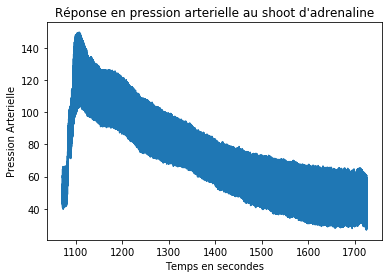

In [11]:
# Petit affichage pour visualiser la courbe :
plt.plot(data["Temps"], data["PressionArterielle"])
plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

On observe la courbe caractéristique de la réponse l'injection d'adrenaline : une augmentation rapide jusqu'à un pic, puis une décroissance lente jusqu'à un retour à la normale.
Pour mieux comprendre la réponse à l'injection d'adrenaline : Julie nous a fourni une vidéo présentant les effets. Ces informations sont complémentaires mais notre travail ici doit se réaliser sans forcément avoir ces informations.

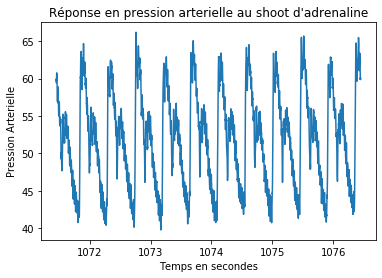

In [12]:
plt.plot(data["Temps"][0:5000], data["PressionArterielle"][0:5000])
plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

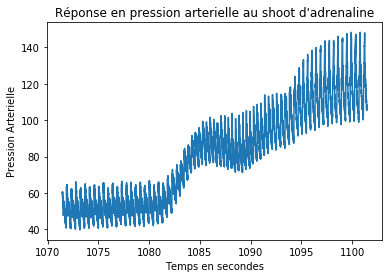

In [13]:
plt.plot(data["Temps"][0:30000], data["PressionArterielle"][0:30000])
plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

Ces deux courbes nous permettent d'obtenir des informations supplémentaires utiles sur ces courbes :

La période semble être de l'ordre de plusieurs centaines de ms (300 à 500 selon l'endroit on se place), et semble changer avec le temps, ce qui est peu commun et n'est pas vraiment pris en charge par les outils classiques que l'on va utiliserk ensuite.
L'amplitude des variations varie également, et ne semble pas vraiment suivre une forme "multiplicative" ou "additive". Cela constitue une deuxième difficulté, puisque ces deux modèles sont facile à traiter, mais qu'en sortir complique nettement notre étude.

## Utilisation de statsmodels

Le module statsmodel est très répandu pour le traitement de la saisonalité, c'est un bon point de départ. Nous allons d'abord traiter un échantillon court, de 5 secondes (un peu plus de 10 périodes déjà)

Bibliographie : https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL

In [14]:
import statsmodels.tsa.seasonal as seasonmodule

La fonction STL devrait être assez performante. Toutefois elle demande ce qu'on entre la période manuellement. Testons d'entrer une valeur approximative comme 500 :

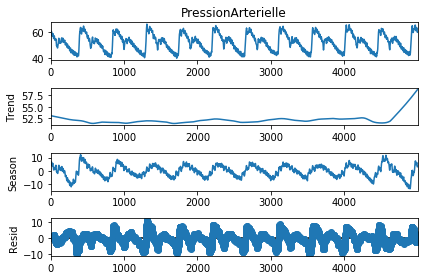

In [15]:
result = seasonmodule.STL(data["PressionArterielle"][0:5000], period = 500).fit()
result.plot()
plt.show()

Comme on peut voir c'est vraiment pas terrible. Toutefois en utilisant un périodigramme on peut trouver la période de la saisonnalité. On va utiliser une fonction de scipy pour cela

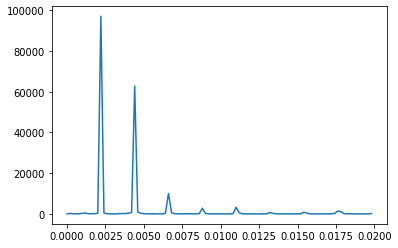

In [16]:
import scipy 
freq, intensity = scipy.signal.periodogram(data["PressionArterielle"][0:5000])
plt.plot(freq[0:100], intensity[0:100])
plt.show()

In [17]:
# On recupere le max :
max_index = np.argmax(intensity)
period = 1/freq[max_index]
print("La periode est d'environ : ", period, "ms")

La periode est d'environ :  454.5454545454545 ms


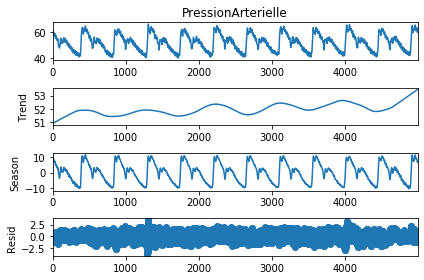

In [18]:
result = seasonmodule.STL(data["PressionArterielle"][0:5000], period = int(period)).fit()
result.plot()
plt.show()

Ca marche vraiment pas mal, le résidu reste faible et la saisonnalité est bien capturée

### Module Seasonal

Seasonal est un petit module qui propose une fonction qui permet de réaliser la même décomposition, sans avoir à indiquer la période. Cela peut le rendre utile pour la suiet

https://github.com/welch/seasonal

In [19]:
# pip install seasonal
import seasonal.seasonal
data_test = data["PressionArterielle"][0:5000]

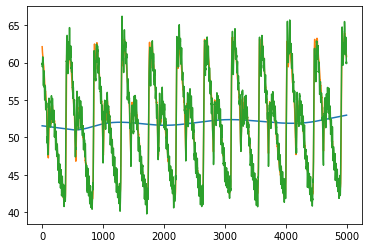

In [20]:
seasons, trend = seasonal.fit_seasons(data_test)
adjusted = seasonal.adjust_seasons(data_test, seasons=seasons)
residual = adjusted - trend
plt.figure()
plt.plot(trend, label = "Trend")
plt.plot(data_test - residual, label = "adjusted")
plt.plot(data_test, label = "data")

## Utilisation de la décomposition sur une courbe entière

Ces outils devraient être suffisant pour le moment, essayons désormais de l'appliquer au projet lapin.

L'idée est d'appliquer la décomposition sur toute la courbe. Un premier problème assez évident va se présenter : Le temps de traitement serait beaucoup trop long si on se contente d'appliquer les fonctions précédentes sur toutes la courbe (pour 5000 données donc pour 5 secondes, ça prend déjà pas mal de temps...). 
Ces fonctions sont en effet complexes, on va donc commencer par simplifier la courbe et garder moins de point

In [21]:
# réduction de la qualité :

q = 10

# Si q = 10, on va garder un point sur 10

# Création de la nouvelle dataframe : 
temps_total = 100 # On teste avant 100 secondes. Si ça marche, y'a déjà de quoi être content !
new_data = pd.DataFrame()
n = 100 * 1000

for i in range(0,n):

    if i%q == 0:
        new_data = pd.concat([new_data, data.iloc[[i]] ])

In [22]:
new_data.head() # La nouvelle dataframe est bien crée

,Unnamed: 0,Temps,PressionArterielle,Spirometrie,PAmoyenne,FrequenceCardiaque,FrequenceRespiratoire,Remarque
0,0,1071.449,59.49,-0.008,48.5519,119.9453,60.7263,#* adrénaline
10,10,1071.459,60.68,-0.005,48.5519,119.9453,60.7263,NaN
20,20,1071.469,57.18,-0.005,48.5519,119.9453,60.7263,NaN
30,30,1071.479,58.83,-0.004,48.5519,119.9453,60.7263,NaN
40,40,1071.489,55.42,-0.001,48.5519,119.9453,60.7263,NaN


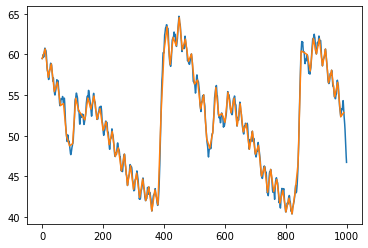

In [23]:
# Visualisation :
plt.plot(data["PressionArterielle"][0:1000])
plt.plot(new_data["PressionArterielle"][0:100])

# On peut voir que la courbe est légèrement simplifiée, mais que ça reste très proche de la réalité.

Une fois la data assez simplifiée, on peut essayer de réutilisée les fonctions de saisonalités.

Malheuresement statsmodels semble compliqué à utiliser ici, la fonction periodigram de scipy patauge même avec seulement 5 secondes à traiter :

In [28]:
freq, intensity = scipy.signal.periodogram(new_data["PressionArterielle"][1000:2000])
# On recupere le max :
max_index = np.argmax(intensity)
period = 1/freq[max_index]
print("La periode est d'environ : ", period, " *  10 ms")

La periode est d'environ :  1000.0  *  10 ms


Il serait possible de regarder les pics secondaires et de séléctionner la première valeur "réalisable" (entre 300ms et 500ms par exemple).

Essayons maintenant avec le module seasonal.seasonal :

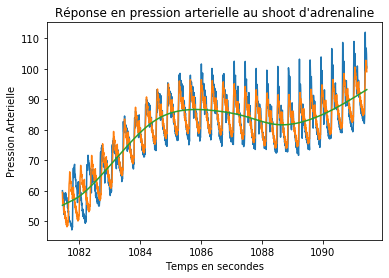

In [29]:
data_pression = new_data[1000:2000]['PressionArterielle']
data_temps = new_data[1000:2000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

Seasonnal marche déjà mieux même si ce n'est pas parfait. Les difficultés des fonctions utilisées ici viennent de la variation de fréquence, qui les rend vraiment moins efficaces, ainsi que de la variation d'amplitude.

Pour parer à cela, l'idée que j'avais eu (mais il en existe surement d'autres) était de diviser la courbe en plusieurs parcelles, et de les "recoller" ensuite.

Essayons avec des parcelles de 10 secondes, à la "main" pour voir les difficultés qu'on peut rencontrer

In [224]:
trend_global = []
generated_global = []
temps = []


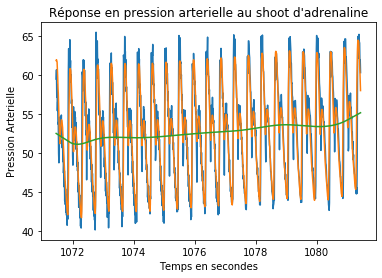

In [225]:
# Pour 0 à 10 s :

data_pression = new_data[0:1000]['PressionArterielle']
data_temps = new_data[0:1000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

trend_global += trend.tolist()
generated_global += generated.tolist()
temps += data_temps.tolist()

Sur une courbe stable, la décomposition marche vraiment bien

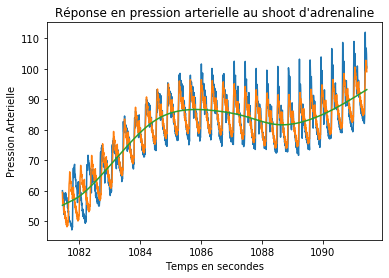

In [226]:
# Pour 10 à 20 s :

data_pression = new_data[1000:2000]['PressionArterielle']
data_temps = new_data[1000:2000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

trend_global += trend.tolist()
generated_global += generated.tolist()
temps += data_temps.tolist()

On observe ici le problème de changement de période. La période au tout début n'est pas la même que celle du reste. De même le changement d'amplitude est problématique. La fonction a du mal a traiter ce cas ci, et une durée de 5 secondes pourrait être plus efficace.

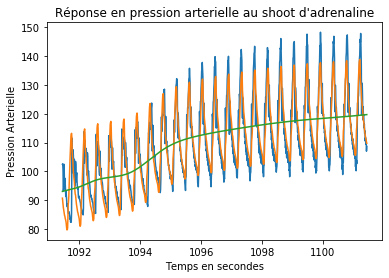

In [227]:
# Pour 20 à 30 s :

data_pression = new_data[2000:3000]['PressionArterielle']
data_temps = new_data[2000:3000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

trend_global += trend.tolist()
generated_global += generated.tolist()
temps += data_temps.tolist()

De même que la courbe précédente, le changement de fréquence et d'amplitude se font ressentir ici

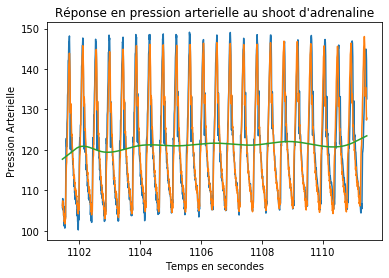

In [228]:
# Pour 30 à 40 s :

data_pression = new_data[3000:4000]['PressionArterielle']
data_temps = new_data[3000:4000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

trend_global += trend.tolist()
generated_global += generated.tolist()
temps += data_temps.tolist()

Cette courbe est assez stable, la décomposition est toujours aussi efficace lors que ni l'amplitude ni la fréquence changent

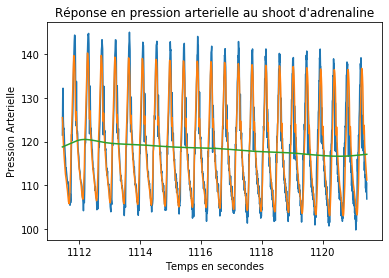

In [229]:
# Pour 40 à 50 s :

data_pression = new_data[4000:5000]['PressionArterielle']
data_temps = new_data[4000:5000]['Temps']

seasons, trend = seasonal.fit_seasons(data_pression)

adjusted = seasonal.adjust_seasons(data_pression, seasons=seasons)
residual = adjusted - trend
generated = data_pression - residual

plt.figure()
plt.plot(data_temps, data_pression, label = "data")
plt.plot(data_temps, generated, label = "adjusted")
plt.plot(data_temps, trend)

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

trend_global += trend.tolist()
generated_global += generated.tolist()
temps += data_temps.tolist()

L'amplitude n'est pas parfaitement reproduite mais cela reste très convenable

In [30]:
plt.plot(trend_global)
plt.show()

NameError: name 'trend_global' is not defined

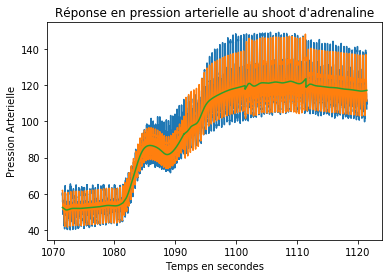

In [231]:
plt.figure()
plt.plot(temps, new_data[0:5000]["PressionArterielle"], label = "data")
plt.plot(temps, generated_global, label = "adjusted")
plt.plot(temps, trend_global, label = "trend")

plt.ylabel("Pression Arterielle")
plt.xlabel("Temps en secondes")
plt.title("Réponse en pression arterielle au shoot d'adrenaline")
plt.show()

On arrive à un résultat assez satisfaisant, même si utiliser des parcelles de 5 secondes pourraient surement permettre à l'outil d'être plus performant, notamment lors de la phase de montée. Utiliser de plus petites périodes devraient en effet nous permettre de mieux capturer la fréquence et l'amplitude de chacune de ces parcelles.

Une autre idée pourrait être d'appliquer la fonction de statmodels, en réduisant les périodes d'études progressivement, tant que le periodigrame ne donne pas un bon résultat.



### Petite conclusion

Cette étude est intéressante, mais doit maintenant permettre au projet d'avancer. LoudML permet déjà de générer des courbes assez bonnes sans le travail présenté ici. Les courbes de LoudML ne sont toutefois pas parfaite, manquant de précision ou de réalisme dans la reproduction de la saisonnalité, même si la génération de la trend elle est réussie, principalement à cause des soucis de fréquence et d'amplitude que l'on a rencontré ici. Traiter d'une fréquence ou d'une amplitude changeante n'est facile pour aucun algorithme.

On pourrait donc faire générer à LoudML ou a un autre outil simplement une trend, à laquelle on rajouterait des saisonnalité. Toutefois, comme l'amplitude et la fréquence change avec le temps, mais également selon le lapin et surement beaucoup d'autres paramètres, il n'est pas gagné de placer le bon motif de saisonnalité à chaque fois ! Ce sera un défi technique important.


Bonne chance !

Alexis